Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import keras
from keras import layers
keras.backend.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='l1SLNKuyTOTvyxuymCK02Yj3GQDrlAxjSLgrZRYD5R2G',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'handwrittendigitrecognition-donotdelete-pr-yvxxug6r0c2f8y'
object_key = 'data.zip'

streaming_body_1 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [3]:
from io import BytesIO
import zipfile
unzip=zipfile.ZipFile(BytesIO(streaming_body_1.read()),'r')
file_paths=unzip.namelist()
for path in file_paths:
    unzip.extract(path)

Loading Data

In [20]:
train = pd.read_csv("/home/wsuser/work/data/train.csv")
test = pd.read_csv("/home/wsuser/work/data/test.csv")

In [21]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
image_size = 28*28
image_size

784

In [24]:
X_train = train.drop("label", axis = 1).copy()
X_test = test.copy()
Y_train = train["label"].copy()

In [25]:
X_train.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


Data Preprocessing

In [26]:
#Normalize values
X_train = X_train/255.0
X_test = X_test/255.0

In [27]:
#Reshape to 28 * 28 so that we can see the images
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)

In [28]:
# no_images=len(X_train)

# # Display random Image
# fig, ax = plt.subplots(figsize=(10, 10))
# cv2.imwrite("img.jpg", X_train[random.randint(0,no_images), :, :, 0])
# plt.imshow(X_train[random.randint(0,no_images), :, :, 0], cmap='Greys', interpolation='nearest') 

# # replace random.randint(0,no_images) in code above with a number if you want to see specific image. 
# #This dispalys a random image each time

# plt.show()

In [29]:
# fig, ax = plt.subplots(figsize=(2,2))

# plt.imshow(X_train[random.randint(0, no_images), :, :, 0], cmap = "Greys", interpolation = "nearest")

# plt.show()

In [30]:
validation_size = 0.2

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = validation_size)

In [31]:
#Get one-hot encoding
Y_train = keras.utils.np_utils.to_categorical(Y_train, num_classes = 10)
Y_val = keras.utils.np_utils.to_categorical(Y_val, num_classes = 10)

In [32]:
def CNN():
    model = keras.Sequential()
    # CONV > CONV > BN > RELU > MAXPOOLING > DROPOUT
    model.add(layers.Conv2D(32, (3, 3), (1, 1), padding='valid', input_shape=(28, 28, 1), name='conv2d_1_1'))
    model.add(layers.Conv2D(32, (3, 3), (1, 1), padding='same', name='conv2d_1_2'))
    model.add(layers.BatchNormalization(name='bn_1'))
    model.add(layers.Activation('relu', name='relu_1'))
    model.add(layers.MaxPooling2D((2, 2), (2, 2), padding='valid', name='mp2d_1'))
    model.add(layers.Dropout(0.2, name='drop_1'))
    # CONV > CONV > BN > RELU > MAXPOOLING > DROPOUT
    model.add(layers.Conv2D(64, (3, 3), (1, 1), padding='valid', name='conv2d_2_1'))
    model.add(layers.Conv2D(64, (3, 3), (1, 1), padding='same', name='conv2d_2_2'))
    model.add(layers.BatchNormalization(name='bn_2'))
    model.add(layers.Activation('relu', name='relu_2'))
    model.add(layers.MaxPooling2D((2, 2), (2, 2), padding='valid', name='mp2d_2'))
    model.add(layers.Dropout(0.2, name='drop_2'))
    # FLATTEN > DENSE > CLASSIFICATION
    model.add(layers.Flatten())
    model.add(layers.Dense(100, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    
    return model

In [33]:
model = CNN()

In [34]:
model.compile(optimizer = "Adam", loss = "CategoricalCrossentropy", metrics = "accuracy")

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1_1 (Conv2D)         (None, 26, 26, 32)        320       
                                                                 
 conv2d_1_2 (Conv2D)         (None, 26, 26, 32)        9248      
                                                                 
 bn_1 (BatchNormalization)   (None, 26, 26, 32)        128       
                                                                 
 relu_1 (Activation)         (None, 26, 26, 32)        0         
                                                                 
 mp2d_1 (MaxPooling2D)       (None, 13, 13, 32)        0         
                                                                 
 drop_1 (Dropout)            (None, 13, 13, 32)        0         
                                                                 
 conv2d_2_1 (Conv2D)         (None, 11, 11, 64)       

In [36]:
training = model.fit(X_train, Y_train, validation_data = (X_val, Y_val), batch_size = 64, epochs = 5, verbose = 1 )

Epoch 1/5
525/525 [==============================] - 90s 170ms/step - loss: 0.2151 - accuracy: 0.9339 - val_loss: 0.0720 - val_accuracy: 0.9771
Epoch 2/5
525/525 [==============================] - 89s 170ms/step - loss: 0.0715 - accuracy: 0.9778 - val_loss: 0.0762 - val_accuracy: 0.9767
Epoch 3/5
525/525 [==============================] - 88s 167ms/step - loss: 0.0538 - accuracy: 0.9829 - val_loss: 0.0660 - val_accuracy: 0.9805
Epoch 4/5
525/525 [==============================] - 89s 169ms/step - loss: 0.0458 - accuracy: 0.9850 - val_loss: 0.0416 - val_accuracy: 0.9889
Epoch 5/5
525/525 [==============================] - 89s 169ms/step - loss: 0.0388 - accuracy: 0.9878 - val_loss: 0.0578 - val_accuracy: 0.9832


In [37]:
def predict(model, X, start,end):
    s = int(np.sqrt(end-start))
    fig, ax = plt.subplots(s, s, sharex=True, sharey=True, figsize=(15, 15))
    ax = ax.flatten()
    preds = model.predict(X[start:end])
    for i in range(end-start):
        y_pred = np.argmax(preds[i])
        img = X[start+i].reshape(28, 28)
        ax[i].imshow(img, cmap='Greys', interpolation='nearest')
        ax[i].set_title(f'p: {y_pred}')

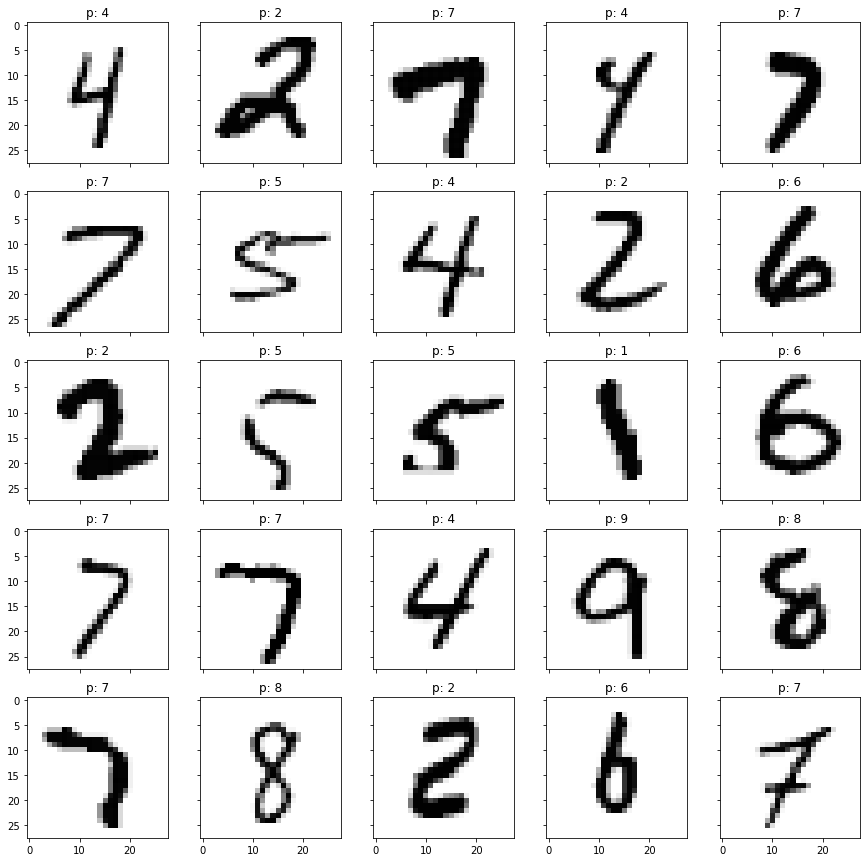

In [38]:
predict(model, X_test, 25,50)

In [39]:
model.save("model.h5")

In [40]:
!tar -zcvf Digit-Recognition-model_new.tgz model.h5

model.h5


In [41]:
ls -1

data/
Digit-Recognition-model_new.tgz
model.h5


In [42]:
!pip install watson-machine-learning-client --upgrade

     |████████████████████████████████| 538 kB 13.8 MB/s eta 0:00:01


In [45]:
from ibm_watson_machine_learning import APIClient
wml_credentials={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"PyE-y2TaHIBuZgIBqLmXzt9ob6mYwOt_e3TZWjABvEuQ"
}
client=APIClient(wml_credentials)

In [46]:
def guid_from_space_name(client,space_name):
    space=client.spaces.get_details()
    return (next(item for item in space['resources'] if item['entity']["name"]==space_name)['metadata']['id'])

In [47]:
space_uid=guid_from_space_name(client,'Handwritten Digit Recognition System')
print("Space UID = "+space_uid)

Space UID = 63a199a8-b8f5-41c3-b00b-db4b853a8752


In [48]:
client.set.default_space(space_uid)

'SUCCESS'

In [49]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [50]:
software_spec_uid=client.software_specifications.get_uid_by_name("tensorflow_rt22.1-py3.9")
software_spec_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [51]:
model_details=client.repository.store_model(model='Digit-Recognition-model_new.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"Digit Recognition Model",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid
})
model_id=client.repository.get_model_id(model_details)

In [52]:
model_details=client.repository.store_model(model='Digit-Recognition-model_new.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"Digit Recognition Model",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid
})
model_id=client.repository.get_model_id(model_details)

In [54]:
model_id

'842f2ed7-cd59-4d43-ad9d-d8b6d96336cf'

In [55]:
client.repository.download(model_id,'Digit_Recog_Model.tar.gz')

Successfully saved model content to file: 'Digit_Recog_Model.tar.gz'


'/home/wsuser/work/Digit_Recog_Model.tar.gz'

In [56]:
ls

data/  Digit_Recog_Model.tar.gz  Digit-Recognition-model_new.tgz  model.h5


In [57]:
from tensorflow.keras.models import load_model
from keras.preprocessing import image
from PIL import Image
import numpy as np

In [58]:
model=load_model("model.h5")

In [59]:
def predict(model, X, start,end):
    s = int(np.sqrt(end-start))
    fig, ax = plt.subplots(s, s, sharex=True, sharey=True, figsize=(15, 15))
    ax = ax.flatten()
    preds = model.predict(X[start:end])
    for i in range(end-start):
        y_pred = np.argmax(preds[i])
        img = X[start+i].reshape(28, 28)
        ax[i].imshow(img, cmap='Greys', interpolation='nearest')
        ax[i].set_title(f'p: {y_pred}')

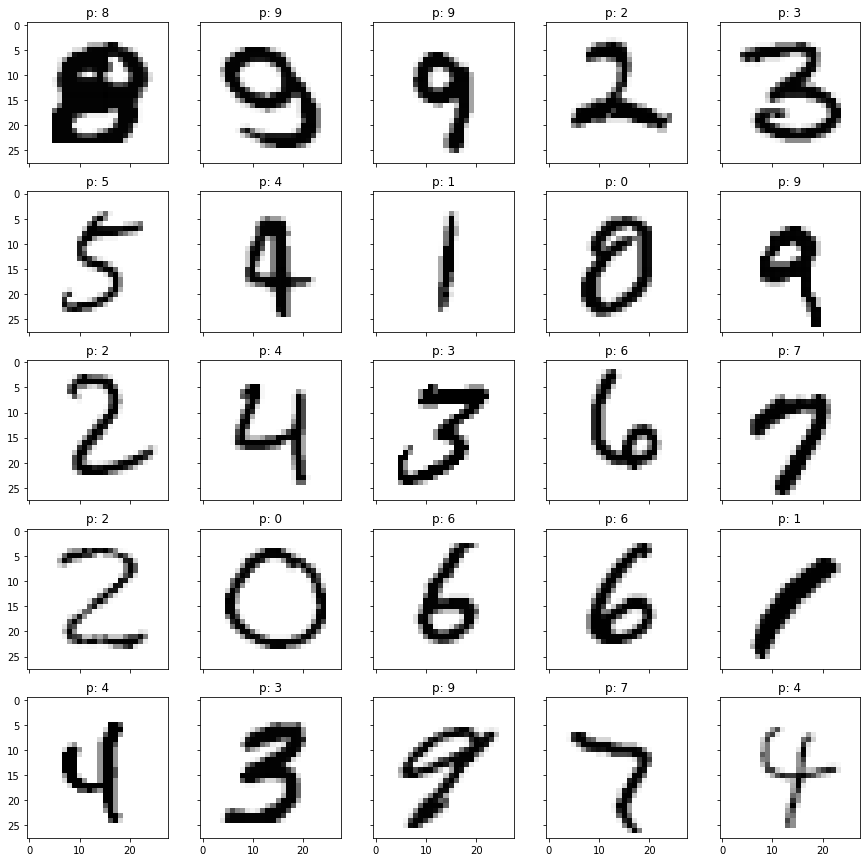

In [61]:
predict(model, X_test, 75,100)